# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [1]:
### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [2]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    dim = len(A)
    if dim != len(B):
        raise Exception("different dimensions")

    sum = 0
    for i in range(dim):
        sum += (A[i] - B[i])**2
    return np.sqrt(sum)
    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

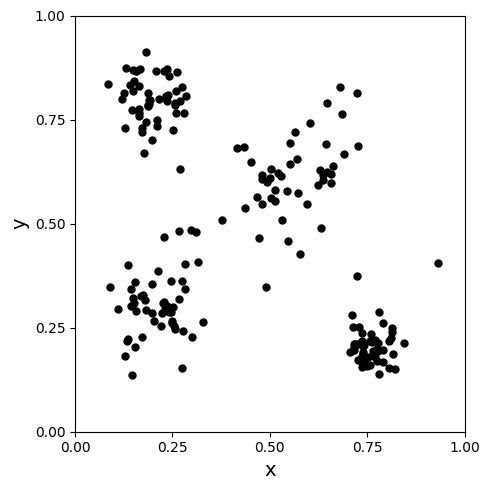

In [3]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [4]:
4

4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

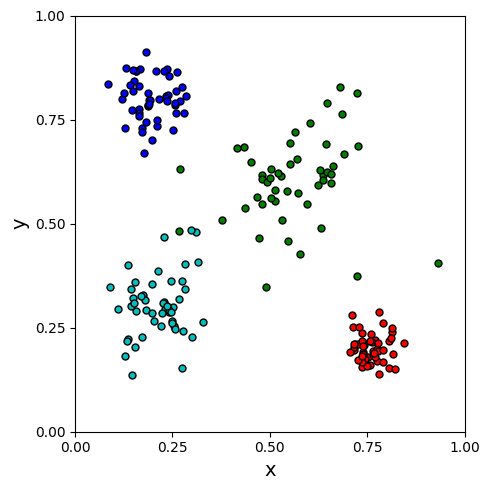

In [5]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [6]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    centroid = list()
    for i in range(K):
        x = np.random.randint(K)
        # for simplicity, we assume no K resulting in infinite loop
        vec = data[x]
        while vec in centroid:
            x = np.random.randint(K)
            vec = data[x]
        centroid.append(vec)
    return centroid

print(getCentroids(2, data))

[[0.18693830608897657, 0.7834271584229567], [0.25980258928914035, 0.7655116779002312]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [7]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    NO_CHANGE = True
    if ASSIGNMENTS is None: NO_CHANGE = False

    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i in range(len(DATA)):
        smallest = np.inf
        idx = 0
        for j in range(K):
            distance = getEuclideanDistance(DATA[i], CENTROIDS[j])
            if smallest > distance:
                smallest = distance
                idx = j

        ### CONSTRUCT NEW ASSIGNMENTS
        NEW_ASSIGNMENTS[idx].append(i)
        if NO_CHANGE:
            if i not in ASSIGNMENTS[idx]:
                NO_CHANGE = False

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = [[] for k in range(K)]
    for i in range(K):
        NEW_CENTROIDS[i] = [0 for l in range(M)]
        for j in NEW_ASSIGNMENTS[i]:
            for m in range(M):
                NEW_CENTROIDS[i][m] += DATA[j][m]

        for m in range(M):
            NEW_CENTROIDS[i][m] /= len(NEW_ASSIGNMENTS[i])

    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS 

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

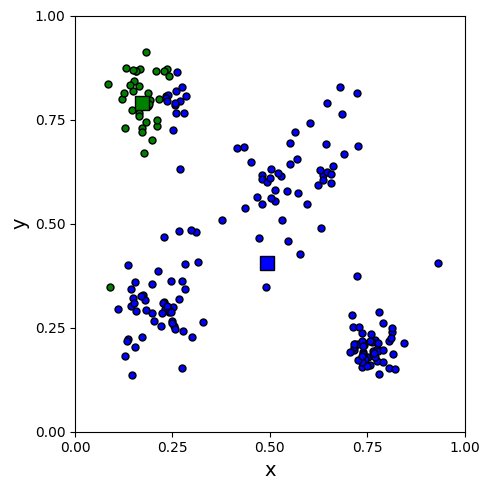

In [8]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

no. of iterations: 7


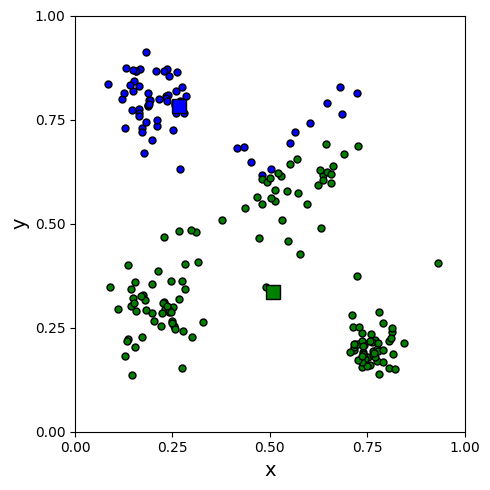

In [9]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)]
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS  = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if NO_CHANGE:
            print("no. of iterations: {}".format(i))
            break
        
    return DATA, CENTROIDS, ASSIGNMENTS   

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

In [10]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)

no. of iterations: 7
no. of iterations: 7
no. of iterations: 6
no. of iterations: 6
no. of iterations: 6
no. of iterations: 4
no. of iterations: 4
no. of iterations: 7
no. of iterations: 4


In terms of iterations needed to form the final clusters, 7, 8 and 10 seem to be the best choices

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrease with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exists some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the following form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

no. of iterations: 7
no. of iterations: 7
no. of iterations: 6
no. of iterations: 6
no. of iterations: 6
no. of iterations: 4
no. of iterations: 4
no. of iterations: 7
no. of iterations: 4
[[2, 47.745840783628104], [3, 37.875500820939386], [4, 15.375607075856347], [5, 14.663327643483631], [6, 14.034241633063376], [7, 13.955861722013328], [8, 13.57983421582505], [9, 13.340231398474408], [10, 13.290131217440644]]


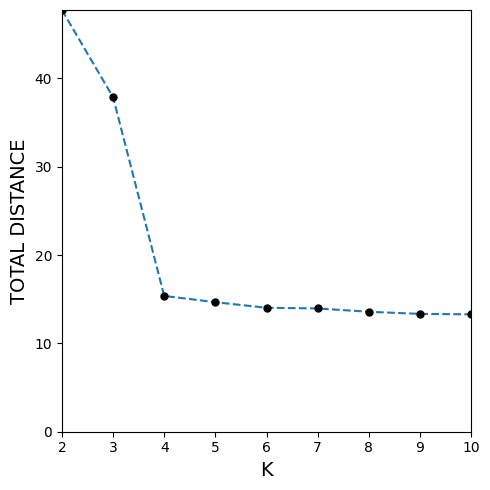

In [11]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    distance = 0.0
    for k in range(len(ASSIGNMENTS)):
        for i in ASSIGNMENTS[k]:
            distance += getEuclideanDistance(CENTROIDS[k], DATA[i])

    return distance

distances = [[] for i in range(9)]

DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    distances[k - 2] = [k, getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS)]

print(distances)
cm.displayResults(plt, distances)

The elbow point appears to be **K = 4** - looking from right to left, at that exact point we observe a great increase in
the total distance. It's ***the elbow***.

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [12]:
DATA = cm.getCaseDataSet()

In [13]:
# find min-max values
min_max_values = [[np.inf, - np.inf] for i in range(5)]
for point in DATA:
    for i in range(5):
        if point[i] < min_max_values[i][0]:
            min_max_values[i][0] = point[i]
        if point[i] > min_max_values[i][1]:
            min_max_values[i][1] = point[i]

print("age - {}".format(min_max_values[0]))
print("salary - {}".format(min_max_values[1]))
print("health index - {}".format(min_max_values[2]))
print("time school/work - {}".format(min_max_values[3]))
print("time sport - {}".format(min_max_values[4]))

### CONSIDER NORMALIZATION HERE

# as we can see, the data differs greatly, thus normalization is needed
for point_idx in range(len(DATA)):
    for i in range(5):
        DATA[point_idx][i] = (DATA[point_idx][i] - min_max_values[i][0]) / (min_max_values[i][1] - min_max_values[i][0])

age - [15.012362258670485, 79.5991240593619]
salary - [5.682015914647337, 6784.1019258316755]
health index - [12.913542297443495, 99.881408211431]
time school/work - [0.02237807600858785, 59.98286275905256]
time sport - [0.07828167791577645, 19.538265943140427]


no. of iterations: 6
no. of iterations: 9
no. of iterations: 5
no. of iterations: 10
no. of iterations: 7
no. of iterations: 10
no. of iterations: 9
no. of iterations: 6
no. of iterations: 8
[[2, 131.57697187054572], [3, 95.7389541971588], [4, 71.36234735595687], [5, 69.59982752966219], [6, 52.456965770676796], [7, 50.51324818294893], [8, 48.94188615879535], [9, 48.866553279698856], [10, 46.6618754204351]]


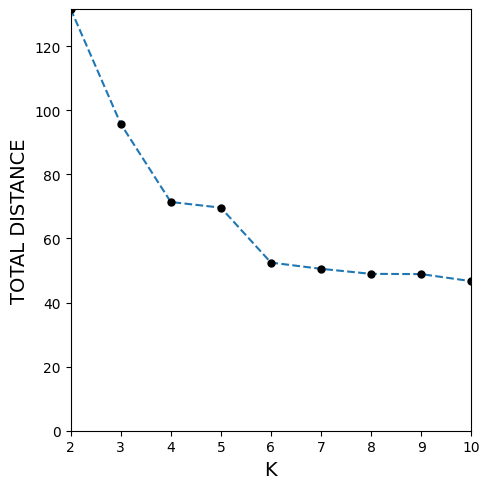

In [14]:
distances = [[] for i in range(9)]

for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA = DATA, CENTROIDS = CENTROIDS, K = k, M = 5)
    distances[k - 2] = [k, getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS)]

print(distances)
cm.displayResults(plt, distances)

### DO THE ANALYSIS HERE (FIND ELBOW)
Elbow - **K = 6**


**Characterize the data in clusters generated by K-means run for suitably adjusted K**

no. of iterations: 7


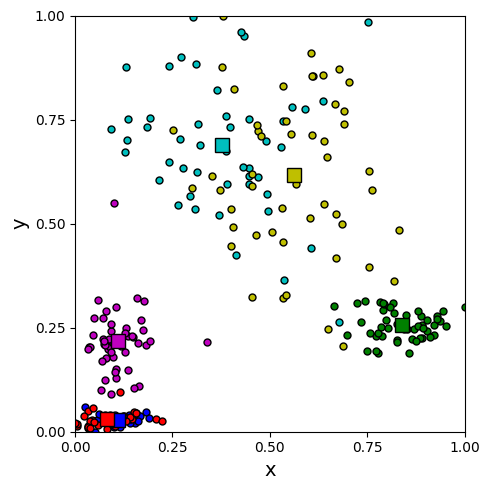

In [15]:
CENTROIDS = getCentroids(6, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA = DATA, CENTROIDS = CENTROIDS, K = 6, M = 5)

DATA_NON_NORMALIZED = cm.getCaseDataSet()
for i in range(6):
    print("Cluster {}:".format(i + 1))
    mean_values = [0 for j in range(5)]
    min_max_values = [[np.inf, - np.inf] for i in range(5)]
    for j in ASSIGNMENTS[i]:
        for val_idx in range(5):
            mean_values[val_idx] += DATA_NON_NORMALIZED[j][val_idx]
            if DATA_NON_NORMALIZED[j][val_idx] < min_max_values[val_idx][0]:
                min_max_values[val_idx][0] = DATA_NON_NORMALIZED[j][val_idx]
            if DATA_NON_NORMALIZED[j][val_idx] > min_max_values[val_idx][1]:
                min_max_values[val_idx][1] = DATA_NON_NORMALIZED[j][val_idx]
    for j in range(5):
        mean_values[j] /= len(ASSIGNMENTS[i])
    print("\tMeans of attributes:")
    for val in mean_values:
        print(val)
    print("\tMin-max values for each attribute:")
    for val in min_max_values:
        print(val)

    stddev_values = [0 for j in range(5)]
    for j in ASSIGNMENTS[i]:
        for val_idx in range(5):
            stddev_values[val_idx] += (DATA_NON_NORMALIZED[j][val_idx] - mean_values[val_idx])**2
    for j in range(5):
        stddev_values[j] /= len(ASSIGNMENTS[i])
        stddev_values[j] = np.sqrt(stddev_values[j])
    print("\tStandard deviation of each attribute:")
    for val in stddev_values:
        print(val)
    print("\n")


## Cluster 1, 3, 4
All clusters are possibly young adults (although Cluster 4 seem to be older).

Cluster 4 is possibly working adults with regular jobs, but relatively lower earnings than later discussed
middle-aged group (Cluster 5).

Cluster 1 and 3 are **very** similar, although Cluster 1 people do sports about two times as long, resulting in slightly
greater health index.
Both groups seem not to earn much, so they are probably living off their parents' funding, possibly with some part-time
jobs. Their school/work workload suits that of the university (without counting the work done besides school).
with part-time jobs. School/work workload suits that of the university (not counting the work
done besides school).

## Cluster 2
Possibly quite elderly retired people, with poor health. Only about 3 hours of working and 2 hours of sports suits an
average, retired person.

## Cluster 5
Possibly middle-aged, working people. The workload (40h) and earnings (4677 zł) suits that label.

## Cluster 6
Intermediate between elderly (Cluster 2) and middle-aged (Cluster 5). About similar earnings to middle-aged for about
10 additional hours of working resulted in lower health index.

*(In case obtained results differ based on randomness, here's the output we refer)*
```
Cluster 1:
	Means of attributes:
20.35037510630312
209.6001021218456
74.82484261094704
15.746868774391956
13.609920398397069
	Min-max values for each attribute:
[15.012362258670485, 29.41303379969164]
[52.93966747957704, 657.3407726999387]
[45.319637777921656, 99.881408211431]
[10.657911584484529, 21.164388918312092]
[10.486553180957856, 17.72059446085231]
	Standard deviation of each attribute:
3.964576956339556
122.34373421524221
15.41519835486076
2.941740810883492
1.9161256935379174


Cluster 2:
	Means of attributes:
69.13827451605563
1744.1341243217655
24.52843838459996
3.2977972963241933
2.187431707680819
	Min-max values for each attribute:
[57.89447841194933, 79.5991240593619]
[1291.1384999397003, 2133.53479799757]
[12.913542297443495, 37.04492310916373]
[0.02237807600858785, 9.612156190801082]
[0.11155649970376369, 4.3456307057747035]
	Standard deviation of each attribute:
4.6319853266453705
232.4498713320889
5.588936164967421
2.3917332106084044
1.0906482035093459


Cluster 3:
	Means of attributes:
22.18192405003495
203.20854033441444
70.0406006264005
16.96625938556123
6.496656783711585
	Min-max values for each attribute:
[16.742376949939988, 27.20990403451951]
[5.682015914647337, 409.4460386786146]
[29.948261516677505, 96.60389881540584]
[12.324748428084193, 20.97305835767847]
[1.9009061549577986, 10.093944305142672]
	Standard deviation of each attribute:
3.242914974891119
95.9190365652678
16.974362035984417
2.188184488378735
2.5778592336365325


Cluster 4:
	Means of attributes:
22.10999451264396
1479.7765204548846
36.030579427752585
40.54699530074973
1.7443690246123817
	Min-max values for each attribute:
[17.221903324374978, 36.853083616766504]
[618.1377748562019, 3723.2235494323504]
[24.446376274815762, 55.309999124945044]
[36.508076423035035, 50.72842179502887]
[0.3201738641144276, 4.316674798567535]
	Standard deviation of each attribute:
3.302156521881459
478.63112823733263
5.481553251410255
2.687376865407106
1.0084469552530175


Cluster 5:
	Means of attributes:
39.36307584481845
4677.133624097642
75.39267410441718
39.17453300877883
13.777136907110245
	Min-max values for each attribute:
[20.966947840003726, 63.518603029249064]
[1793.0655361138006, 6756.885293464878]
[42.378685675151296, 98.7074566284996]
[27.00970454921195, 56.784637446224664]
[6.549819148296349, 19.538265943140427]
	Standard deviation of each attribute:
9.843654757667393
1047.6110716278536
14.336586756727394
6.223292713196262
3.1928113575078156


Cluster 6:
	Means of attributes:
51.23462724489917
4185.291169886642
50.58103733324035
52.04465764044394
2.9849597335547795
	Min-max values for each attribute:
[31.275703003776062, 68.66380009272345]
[1403.3704209479874, 6784.1019258316755]
[16.510679111040552, 79.94666769646562]
[38.07444712284969, 59.98286275905256]
[0.07828167791577645, 9.574417290027124]
	Standard deviation of each attribute:
8.744594448062669
1260.1037233954914
13.000548562489788
5.461320688377733
2.406457581377516
```